🔹 Step 1: Data Cleaning
 

 1.1. Import Libraries and Load the Dataset

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("Global_Cybersecurity_Threats_2015-2024.csv")
df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


1.2. Basic Information About Dataset

In [5]:
# Shape and structure
print("Shape:", df.shape)
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())


Shape: (3000, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB

Missing values per

1.3. Preview Unique Values (Categorical Exploration)

In [7]:
# View unique values in key columns
print("Attack Types:", df['Attack Type'].unique())
print("Target Industries:", df['Target Industry'].unique())
print("Attack Sources:", df['Attack Source'].unique())
print("Defense Mechanisms:", df['Defense Mechanism Used'].unique())


Attack Types: ['Phishing' 'Ransomware' 'Man-in-the-Middle' 'DDoS' 'SQL Injection'
 'Malware']
Target Industries: ['Education' 'Retail' 'IT' 'Telecommunications' 'Government' 'Banking'
 'Healthcare']
Attack Sources: ['Hacker Group' 'Nation-state' 'Insider' 'Unknown']
Defense Mechanisms: ['VPN' 'Firewall' 'AI-based Detection' 'Antivirus' 'Encryption']


🔹 Step 2: Exploratory Data Analysis (EDA)
 📸 Save Visualizations as PNG

2.1: Number of Attacks Per Year

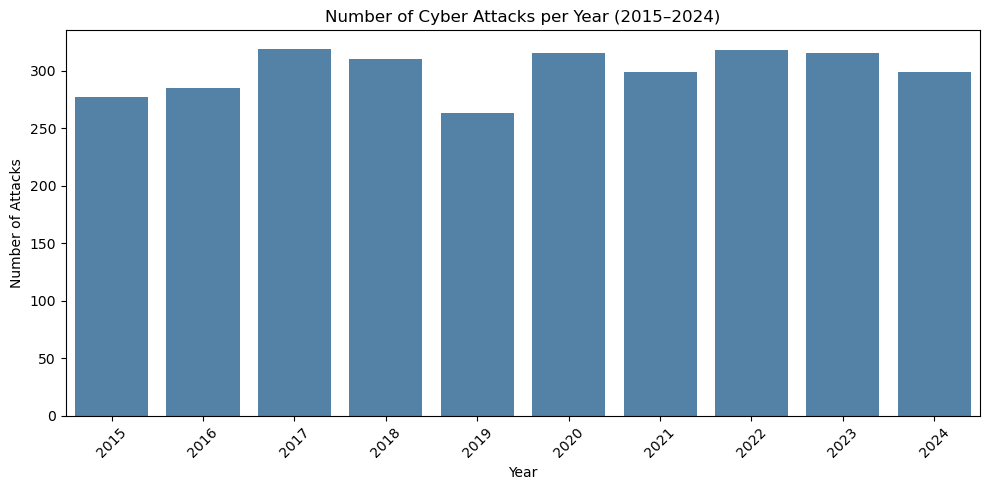

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Year', color='steelblue')
plt.title('Number of Cyber Attacks per Year (2015–2024)')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.tight_layout()
plt.show()
plt.savefig("attacks_per_year.png", bbox_inches='tight')

2.2: Top 10 Countries with Most Cyber Attacks

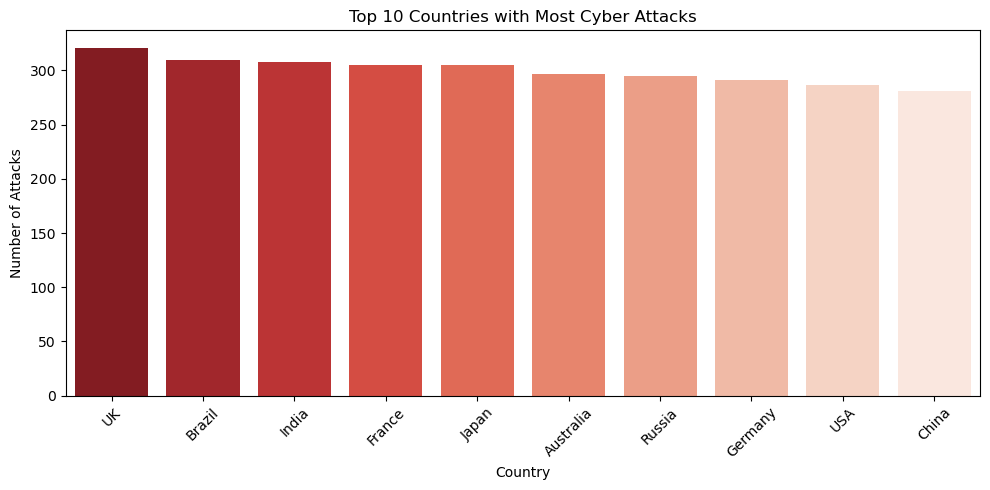

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(10, 5))
top_countries = df['Country'].value_counts().head(10)
sns.barplot(x=top_countries.index, y=top_countries.values, 
            hue=top_countries.index, palette='Reds_r', legend=False)
plt.title('Top 10 Countries with Most Cyber Attacks')
plt.ylabel('Number of Attacks')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("top_10_countries_attacks.png", bbox_inches='tight')

2.3: Attack Types Frequency

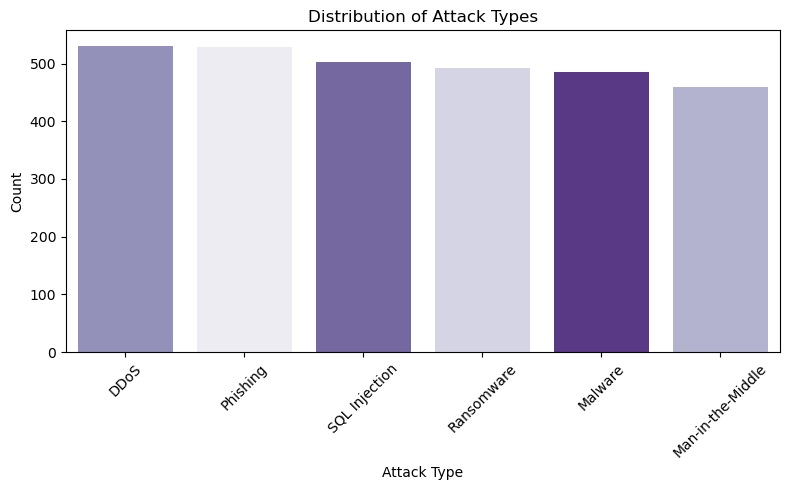

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Attack Type',hue='Attack Type', order=df['Attack Type'].value_counts().index, palette='Purples')
plt.title('Distribution of Attack Types')
plt.xticks(rotation=45)
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()
plt.savefig("attack_types_distribution.png", bbox_inches='tight')

2.4: Financial Loss by Attack Type

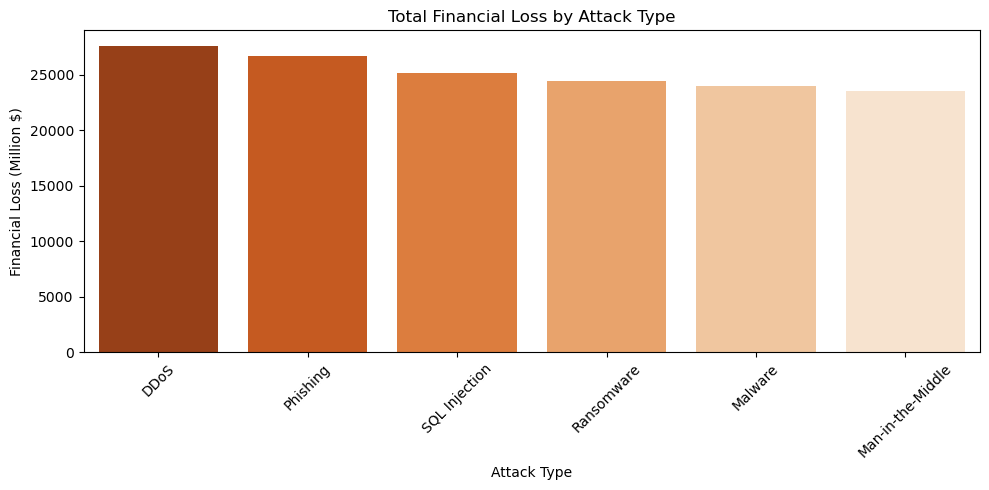

<Figure size 640x480 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 5))
loss_by_attack = df.groupby('Attack Type')['Financial Loss (in Million $)'].sum().sort_values(ascending=False)
sns.barplot(x=loss_by_attack.index,hue=loss_by_attack.index, y=loss_by_attack.values, palette='Oranges_r')
plt.title('Total Financial Loss by Attack Type')
plt.ylabel('Financial Loss (Million $)')
plt.xlabel('Attack Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("financial_loss_by_attack.png", bbox_inches='tight')

2.5: Avg Resolution Time by Defense Mechanism

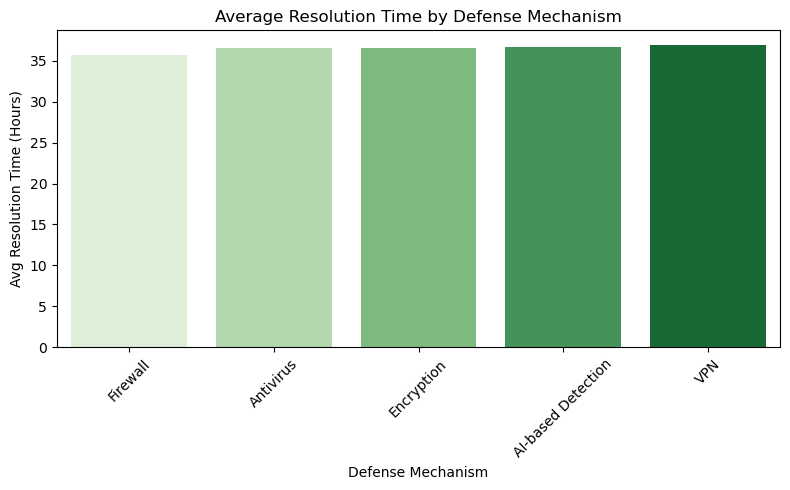

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(8, 5))
avg_resolution = df.groupby('Defense Mechanism Used')['Incident Resolution Time (in Hours)'].mean().sort_values()
sns.barplot(x=avg_resolution.index,hue=avg_resolution.index, y=avg_resolution.values, palette='Greens')
plt.title('Average Resolution Time by Defense Mechanism')
plt.ylabel('Avg Resolution Time (Hours)')
plt.xlabel('Defense Mechanism')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig("resolution_time_by_defense.png", bbox_inches='tight')

In [19]:
# Save the cleaned dataset
df.to_csv("cleaned_cybersecurity_threats.csv", index=False)
print("✅ Cleaned CSV saved as 'cleaned_cybersecurity_threats.csv'")


✅ Cleaned CSV saved as 'cleaned_cybersecurity_threats.csv'


🔹 Step 3: Modeling (Anomaly Detection & Behavioral Analytics)


3.1: Feature Engineering
🎯 Goal:
Convert categorical columns to numeric (encoding)

Normalize continuous features (scale them for ML)

In [22]:
import pandas as pd

#1 Load your cleaned data 
df = pd.read_csv("cleaned_cybersecurity_threats.csv")
df.head()


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


In [23]:
 #2.Encoding Categorical Features
#We'll use OneHot Encoding for models like Random Forest and Label Encoding for others like Isolation Forest.
from sklearn.preprocessing import LabelEncoder

# Make a copy
df_model = df.copy()

# Encode Attack Type, Target Industry, Attack Source
label_cols = ['Attack Type', 'Target Industry', 'Attack Source']

le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])


In [24]:
# 3. Normalize Continuous Features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_model[['Financial Loss (in Million $)', 
          'Number of Affected Users', 
          'Incident Resolution Time (in Hours)']] = scaler.fit_transform(
    df_model[['Financial Loss (in Million $)', 
              'Number of Affected Users', 
              'Incident Resolution Time (in Hours)']]
)


Now data is encoded & normalized — we’re ready for modeling!
3.2  Modeling Techniques

In [26]:
#✅ Model 1: Isolation Forest (Anomaly Detection)
from sklearn.ensemble import IsolationForest

# Select numeric features for modeling
features = ['Attack Type', 'Target Industry', 'Attack Source',
            'Financial Loss (in Million $)', 'Number of Affected Users', 
            'Incident Resolution Time (in Hours)']

X = df_model[features]

# Fit the model
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df_model['anomaly_iforest'] = iso_forest.fit_predict(X)

# Show how many anomalies were found (-1 = anomaly)
df_model['anomaly_iforest'].value_counts()


anomaly_iforest
 1    2850
-1     150
Name: count, dtype: int64

✅ Explanation for (Model 1 – Isolation Forest):
Out of 3,000 cyber incidents, the Isolation Forest model flagged 150 records (5%) as anomalous, indicating unusual attack patterns or behaviors that deviate from the norm.

In [28]:
#✅ Model 2: One-Class SVM (Anomaly Detection)
from sklearn.svm import OneClassSVM

# Using the same feature set
X = df_model[['Attack Type', 'Target Industry', 'Attack Source',
              'Financial Loss (in Million $)', 'Number of Affected Users',
              'Incident Resolution Time (in Hours)']]

# Fit the One-Class SVM model
oc_svm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.05)
df_model['anomaly_ocsvm'] = oc_svm.fit_predict(X)

# Summary of predictions
df_model['anomaly_ocsvm'].value_counts()


anomaly_ocsvm
 1    2845
-1     155
Name: count, dtype: int64

✅ Explanation for Model 2 – One-Class SVM:
The One-Class SVM model identified 155 out of 3,000 cyber incidents (~5.2%) as anomalies, suggesting these records significantly deviate from the typical behavior patterns learned from the dataset.

In [30]:
#✅ Model 3: KMeans Clustering (Behavioral Grouping)
from sklearn.cluster import KMeans

# We'll cluster the same feature set into 3 groups
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_model['cluster_kmeans'] = kmeans.fit_predict(X)

# Show how many records in each cluster
df_model['cluster_kmeans'].value_counts()


cluster_kmeans
0    1196
2     941
1     863
Name: count, dtype: int64

✅ Explanation for Model 3 – KMeans Clustering:
The KMeans model segmented the 3,000 cybersecurity incidents into 3 distinct clusters: 1,196 in Cluster 0, 941 in Cluster 2, and 863 in Cluster 1 — revealing underlying behavioral patterns and similarities among different types of cyber attacks.